In [ ]:
%matplotlib inline

: 

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

: 

In [ ]:
import numpy as np

: 

In [ ]:
def solution(t,x):
    f = np.exp(-(t-x)**2)
    return f

def initial_data(x):
    f = np.exp(-x**2)
    fprime = 2.*x*np.exp(-x**2)
    return np.array([f,fprime])

def rhs(t, f):
    dt_phi = np.zeros_like(f[0])
    dt_phi[1:-1] = f[1][1:-1]
    
    dt_psi = np.zeros_like(f[1])
    dt_psi[1:-1] = deriv2(f[0], dx)
    return np.array([dt_phi, dt_psi])

: 

In [167]:
x = np.linspace(-3., 3., 20)
dx = x[1] - x[0]

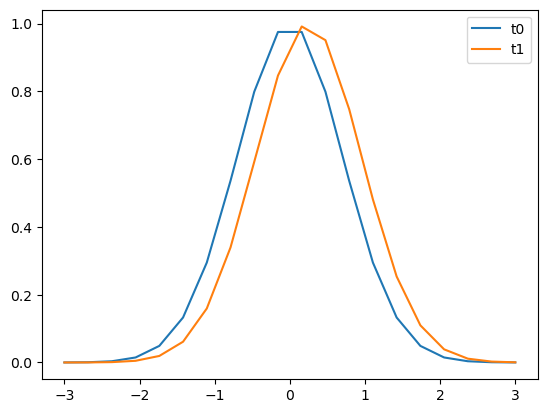

In [168]:
t0 = 0.
t1 = 0.25
plt.plot(x, solution(t0, x), label="t0")
plt.plot(x, solution(t1, x), label="t1")
plt.legend();

In [169]:
def deriv2(f, dx):
    fprimeprime = (f[2:] - 2*f[1:-1] + f[0:-2])/dx**2
    return fprimeprime
def deriv1(f, dx):
    fprime = (f[2:] - f[1:-1])/dx
    return fprime

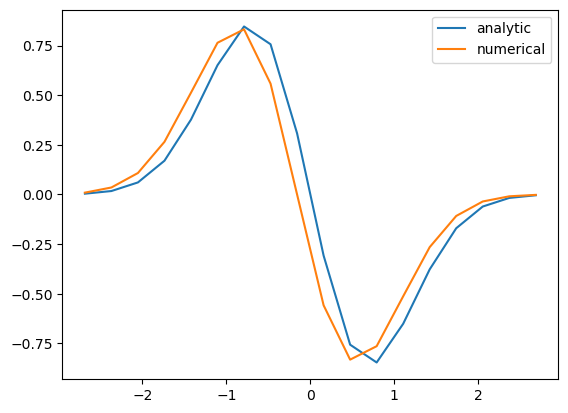

In [170]:
# 1st deriv of my solution test function (form Mathematica / Maple is) at t=0:
# -2*x*exp(-x**22)
fprime = -2.*x*np.exp(-x**2)
sol0 = solution(0., x)
numderiv1 = deriv1(sol0, dx)
plt.plot(x[1:-1], fprime[1:-1], label="analytic")
plt.plot(x[1:-1], numderiv1, label="numerical")
plt.legend();

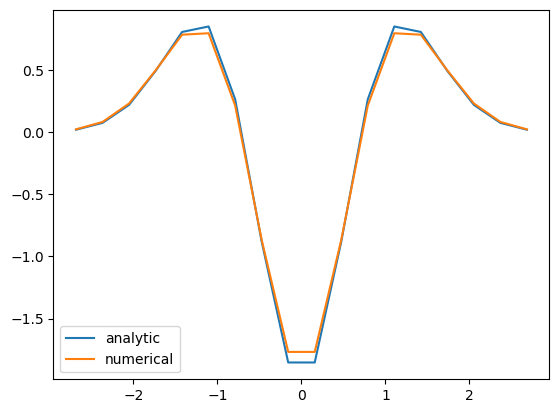

In [171]:
# 2nd deriv of my solution test function (form Mathematica / Maple is) at t=0:
# -2*exp(-x^2)+4*x^2*exp(-x^2)
fprimeprime = -2.*np.exp(-x**2)+4*x**2*np.exp(-x**2)
sol0 = solution(0., x)
numderiv2 = deriv2(sol0, dx)
plt.plot(x[1:-1], fprimeprime[1:-1], label="analytic")
plt.plot(x[1:-1], numderiv2, label="numerical")
plt.legend();

In [188]:
# apply a boundary condtion at end points where derivatives cannot be computed
def dirichlet_boundary_condition(f):
    fout = f.copy()
    # set phi to zero at bondary
    fout[0][0] = 0.
    fout[0][-1] = 0.
    # set psi to zero at bondary -> phi stays zero
    fout[1][0] = 0.
    fout[1][-1] = 0.
    return fout

# apply a boundary condtion at end points where derivatives cannot be computed
def periodic_boundary_condition(f):
    fout = f.copy()
    # periodic boundary conditions
    fout[0][0] = f[0][-2]
    fout[0][-1] = f[0][1]
    # set psi to zero at bondary -> phi stays zero
    fout[1][0] = f[1][-2]
    fout[1][-1] = f[1][1]
    return fout

boundary_condition = dirichlet_boundary_condition

# do a single RK2 method step
def rk2step(f, rhs, t, dt):
    k1 = rhs(t, f)
    f1 = f + 1./2.*dt*k1
    f1 = boundary_condition(f1)
    
    k2 = rhs(t + 1./2.*dt, f1)
    f2 = f + dt * k2
    f2 = boundary_condition(f2)
    return f2

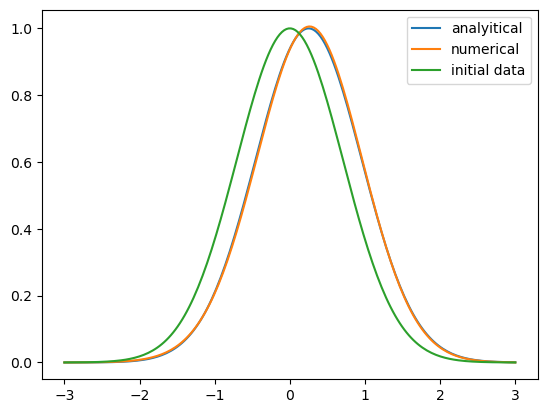

In [189]:
# test RK2 code

dt = 0.25

t0 = 0.
f0 = initial_data(x)

t1 = t0 + dt
f1 = rk2step(f0, rhs, t0, dt)

plt.plot(x, solution(t1, x), label="analyitical")
plt.plot(x, f1[0], label="numerical")
plt.plot(x, f0[0], label="initial data")
plt.legend();

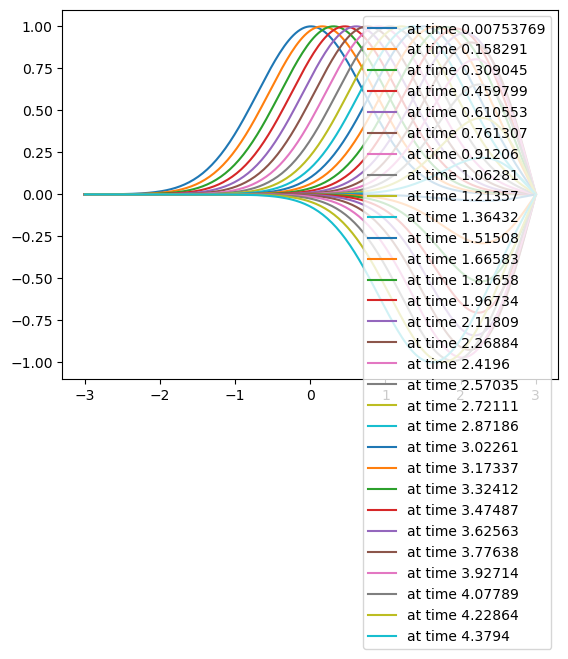

In [198]:
# now to the thing again for real...

# start and end time
t0 = 0.
t1 = 4.5

# grid
x = np.linspace(-3., 3., 200)

# grid spacing
dx = x[1] - x[0]

# time step
dt = dx/4. # this must be "small enough"

t = t0
f = initial_data(x)
it = 0
while (t < t1):
    fnext = rk2step(f, rhs, t, dt)

    t += dt
    f = fnext
    
    if(it % 20 == 0):
        plt.plot(x, f[0], label="at time %g" % t)
    it += 1
plt.legend(loc='best');